In [5]:
#Check
import pandas as pd
df = pd.read_csv('C:\\Users\\harkr\\Downloads\\assess\\books.csv')



In [6]:
#How many books do not have an original title [books.csv]?
#Actual path to books file
file_path = 'C:/Users/harkr/Downloads/assess/books.csv'

# Read books csv into a Pandas DataFrame
df = pd.read_csv(file_path)
books_without_original_title = df['original_title'].isnull().sum()
print(f"The number of books without an original title is: {books_without_original_title}")


The number of books without an original title is: 36


In [7]:
#How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

# Replace file paths with the actual paths to your CSV files
books_file_path = 'C:/Users/harkr/Downloads/assess/books.csv'
book_tags_file_path = 'C:/Users/harkr/Downloads/assess/book_tags.csv'
ratings_file_path = 'C:/Users/harkr/Downloads/assess/ratings.csv'

#Read files
books_df = pd.read_csv(books_file_path)
book_tags_df = pd.read_csv(book_tags_file_path)
ratings_df = pd.read_csv(ratings_file_path)

# Drop records with null values in the 'original_title' column in books_df
books_df = books_df.dropna(subset=['original_title'])

# Remove corresponding records
book_tags_df = book_tags_df[book_tags_df['goodreads_book_id'].isin(books_df['book_id'])]
ratings_df = ratings_df[ratings_df['book_id'].isin(books_df['book_id'])]
unique_books_count = books_df['book_id'].nunique()
print(f"The number of unique books in the dataset after removing null values in 'original_title' column is: {unique_books_count}")


The number of unique books in the dataset after removing null values in 'original_title' column is: 363


In [8]:
#How many unique users are present in the dataset [ratings.csv] ?

ratings_file_path = 'C:/Users/harkr/Downloads/assess/ratings.csv'
ratings_df = pd.read_csv(ratings_file_path)
unique_users_count = ratings_df['user_id'].nunique()
print(f"The number of unique users in the 'ratings.csv' dataset is: {unique_users_count}")


The number of unique users in the 'ratings.csv' dataset is: 40836


In [9]:
#How many unique tags are there in the dataset [book_tags.csv] ?
import pandas as pd

book_tags_file_path = 'C:/Users/harkr/Downloads/assess/book_tags.csv'
book_tags_df = pd.read_csv(book_tags_file_path)
unique_tags_count = book_tags_df['tag_id'].nunique()
print(f"The number of unique tags in the 'book_tags.csv' dataset is: {unique_tags_count}")


The number of unique tags in the 'book_tags.csv' dataset is: 3651


In [11]:
#Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.
import pandas as pd

book_tags_file_path = 'C:/Users/harkr/Downloads/assess/book_tags.csv'
book_tags_df = pd.read_csv(book_tags_file_path)
most_frequent_tag = book_tags_df['tag_id'].value_counts().idxmax()
print(f"The tag_id that is most frequently used (mapped with the highest number of books) is: {most_frequent_tag}")


The tag_id that is most frequently used (mapped with the highest number of books) is: 4600


In [12]:
#Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

#using method chaining- merge dataframes, groups by book title and count tag occurance

# Replace file paths with the actual paths to your CSV files
books_file_path = 'C:/Users/harkr/Downloads/assess/books.csv'
book_tags_file_path = 'C:/Users/harkr/Downloads/assess/book_tags.csv'

# Read the 'books.csv' and 'book_tags.csv' files into Pandas DataFrames
books_df = pd.read_csv(books_file_path)
book_tags_df = pd.read_csv(book_tags_file_path)

# Find the book with the most number of counts of tags
most_tagged_book = (
    pd.merge(books_df, book_tags_df, left_on='book_id', right_on='goodreads_book_id')
    .groupby('title')['tag_id']
    .count()
    .idxmax()
)

# Print the result
print(f"The book with the most number of counts of tags is: {most_tagged_book}")


The book with the most number of counts of tags is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


<Figure size 1200x600 with 0 Axes>

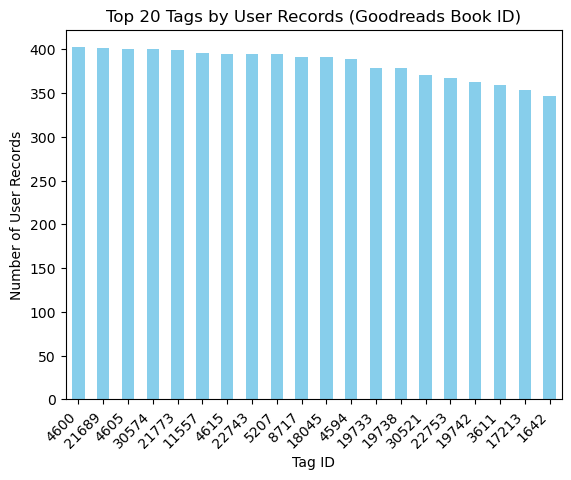

In [14]:
# Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]
import pandas as pd
import matplotlib.pyplot as plt

book_tags_file_path = 'C:/Users/harkr/Downloads/assess/book_tags.csv'
book_tags_df = pd.read_csv(book_tags_file_path)

# Plot using method chaining as well as Nlargest function 
plt.figure(figsize=(12, 6))
(
    book_tags_df.groupby('tag_id')['goodreads_book_id']
    .nunique()
    .reset_index(name='user_records')
    .nlargest(20, 'user_records')
    .plot(kind='bar', x='tag_id', y='user_records', color='skyblue', legend=False)
)
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.title('Top 20 Tags by User Records (Goodreads Book ID)')
plt.xticks(rotation=45, ha='right')
plt.show()
